In [1]:
'''
%load_ext pycodestyle_magic
%pycodestyle_on
'''

In [13]:
%pylab inline

import pandas as pd
import plotly.express as px
import squarify

import gpelletier.custom.projet4.functions as gp4f

Populating the interactive namespace from numpy and matplotlib


In [14]:
data = gp4f.data_no_quali_features('customer_unique_id')
data_subset_tmp = gp4f.subset_by_date(
    data, 'order_purchase_timestamp', '2017-01-01', 3
    )
data_subset_RFM = gp4f.rfm_review_data(
    data, 'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', '2017-01-01', 3, mode='old'
    )

In [15]:
data_subset_RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4788 entries, 0 to 4848
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   payment_value  4788 non-null   float64
 1   frequency      4788 non-null   int64  
 2   recency        4788 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 149.6 KB


In [4]:
data_subset_RFM

,payment_value,frequency,recency
0,86.22,1,21
1,150.12,1,27
2,76.11,1,69
3,35.84,1,12
4,237.81,1,5
...,...,...,...
4844,110.70,1,26
4845,162.10,1,16
4846,665.70,1,74
4847,32.42,1,1


In [ ]:
#--------------------#

In [5]:
# Normal distribution for 'payment_value'
data_subset_RFM['payment_value_log'] = np.log(
    data_subset_RFM['payment_value'] + 1
    )

In [6]:
# The scores will be 1, 2 or 3 for each feature of each row.
# 1 will be a bad score.
# 3 will be the best possible score.

# Because of the normal distribution, we can split the distribution in 3 scores
data_subset_RFM['payment_value_score_bis'] = pd.cut(
    data_subset_RFM['payment_value_log'],
    bins=3,
    labels=range(1, 4)
    ).astype(int)

# Because of the special distribution, the split is arbitrary
# Frequency = 1 => bad score (1)
# Frequency > 2 => best score (3)
bins = [0, 1, 2, np.inf]
labels = [1, 2, 3]
data_subset_RFM['frequency_score_bis'] = pd.cut(
    data_subset_RFM['frequency'],
    bins,
    labels=labels
    ).astype(int)

# Because of the normal distribution, we can split the distribution in 3 scores
data_subset_RFM['recency_score_bis'] = 4 - pd.cut(
    data_subset_RFM['recency'],
    bins=3,
    labels=range(1, 4)
    ).astype(int)

# All 3 scores in one column
data_subset_RFM['RFM_Score'] = data_subset_RFM[
    'recency_score_bis'] * 100 \
        + data_subset_RFM['frequency_score_bis'] * 10 \
        + data_subset_RFM['payment_value_score_bis']

In [ ]:
#--------------------#

In [7]:
# We decide to split the data thanks to their scores in each feature.

data_subset_RFM['label'] = 'Low_value_customers'

data_subset_RFM.loc[
    (data_subset_RFM['RFM_Score'] == 312)
    | (data_subset_RFM['RFM_Score'] == 313)
    | (data_subset_RFM['RFM_Score'] == 331),
    'label'] = 'Customers_to_retain'

data_subset_RFM.loc[
    (data_subset_RFM['RFM_Score'] == 133)
    | (data_subset_RFM['RFM_Score'] == 123)
    | (data_subset_RFM['RFM_Score'] == 132)
    | (data_subset_RFM['RFM_Score'] == 122)
    | (data_subset_RFM['RFM_Score'] == 113),
    'label'] = 'Lost_customers'

data_subset_RFM.loc[
    (data_subset_RFM['RFM_Score'] == 212)
    | (data_subset_RFM['RFM_Score'] == 213)
    | (data_subset_RFM['RFM_Score'] == 221)
    | (data_subset_RFM['RFM_Score'] == 231),
    'label'] = 'Almost_lost'

data_subset_RFM.loc[
    (data_subset_RFM['RFM_Score'] == 233)
    | (data_subset_RFM['RFM_Score'] == 223)
    | (data_subset_RFM['RFM_Score'] == 232)
    | (data_subset_RFM['RFM_Score'] == 222),
    'label'] = 'Try_to_come_back'

data_subset_RFM.loc[
    (data_subset_RFM['RFM_Score'] == 333)
    | (data_subset_RFM['RFM_Score'] == 323)
    | (data_subset_RFM['RFM_Score'] == 322)
    | (data_subset_RFM['RFM_Score'] == 332),
    'label'] = 'Best_customers'

result_df = pd.DataFrame({
    'R': data_subset_RFM['recency'],
    'F': data_subset_RFM['frequency'],
    'M': data_subset_RFM['payment_value'],
    'Segment': data_subset_RFM['label']
})

result_df

,R,F,M,Segment
0,21,1,86.22,Customers_to_retain
1,27,1,150.12,Customers_to_retain
2,69,1,76.11,Low_value_customers
3,12,1,35.84,Customers_to_retain
4,5,1,237.81,Customers_to_retain
...,...,...,...,...
4844,26,1,110.70,Customers_to_retain
4845,16,1,162.10,Customers_to_retain
4846,74,1,665.70,Lost_customers
4847,1,1,32.42,Customers_to_retain


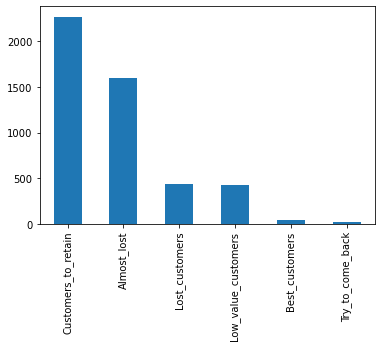

In [8]:
result_df['Segment'].value_counts().plot.bar()

In [ ]:
'''
There is few best customers.

There is a lot of customers, who didn't come back.
'''

In [ ]:
#--------------------#

In [ ]:
# Visualization of the size of each groups (size = number of people in a segment)

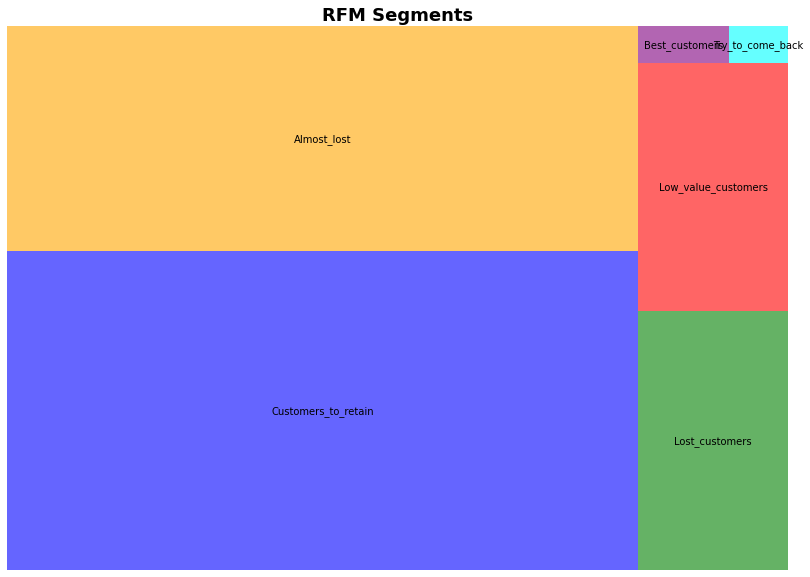

In [9]:
# This first visualiation will use the squarify method

sizes_ = result_df['Segment'].value_counts()
label_ = sizes_.index

cmap = matplotlib.cm.coolwarm
mini = min(sizes_)
maxi = max(sizes_)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in sizes_]

fig = plt.gcf()
ax = fig.add_subplot()

fig.set_size_inches(14, 10)

squarify.plot(
    sizes=sizes_,
    label=label_,
    alpha=0.6,
    color=[
        'blue', 'orange', 'green', 'red', 'purple', 'cyan'
        ]
    )

plt.title('RFM Segments', fontsize=18, fontweight='bold')
plt.axis('off')

plt.show()

In [10]:
result_for_mapping = pd.merge(
    result_df.groupby(by='Segment', as_index=False).median(),
    pd.DataFrame({
        'Segment': result_df['Segment'].value_counts().index,
        'Count': result_df['Segment'].value_counts()
    }).reset_index(drop=True),
    how='left',
    on='Segment'
)

result_for_mapping['Count_log'] = np.log(result_for_mapping['Count'] + 1)

result_for_mapping

,Segment,R,F,M,Count,Count_log
0,Almost_lost,45.0,1.0,100.43,1595,7.375256
1,Best_customers,18.0,2.0,99.59,38,3.663562
2,Customers_to_retain,14.0,1.0,100.01,2270,7.727976
3,Lost_customers,64.0,1.0,176.89,440,6.089045
4,Low_value_customers,64.5,1.0,51.64,420,6.042633
5,Try_to_come_back,41.0,2.0,111.17,25,3.258097


In [11]:
# The second method is to visualize the groups on a plot
# (axes will represent the M and R features of the RFM segmentation)

fig = px.scatter(
    result_for_mapping,
    x='R',
    y='M',
    size='Count',
    color='Segment',
    hover_name='Segment'
)

fig.update_layout(
    title_text='Customers segmentation (M/R)',
    height=600
    )

fig.show()

In [12]:
# In order to better compare the groups,
# we can apply a logarithmic transformation on the size of each group

fig = px.scatter(
    result_for_mapping,
    x='R',
    y='M',
    size='Count_log',
    color='Segment',
    hover_name='Segment'
)

fig.update_layout(
    title_text='Customers segmentation (M/R log)',
    height=600
    )

fig.show()

In [ ]:
'''
The RFM segmentation has two big defaults:
- the segmentation can only represent customers thanks to limited features.
If we want to add more criteria, it will be impossible.
- the scores and, in fine,
the segmentation of the customers depend on arbitrary decision
(e.g. what is a good or bad recency).
'''